In [1]:
import numpy as np
from matplotlib import animation
from IPython.display import HTML
import matplotlib.pyplot as pl
%matplotlib inline
pl.rcParams.update({'font.size': 12})          # Set the standard font size of the plots to 11pt.
#pl.rcParams.update({'figure.figsize': [13,6]}) # Set the standard figure size.

In [24]:
k1 = 8.
k2 = 9.

nx = 384
nt = 128

x = np.linspace(0., 8.*np.pi, nx)
t = np.linspace(0., 20., nt)
xx, tt = np.meshgrid(x, t)

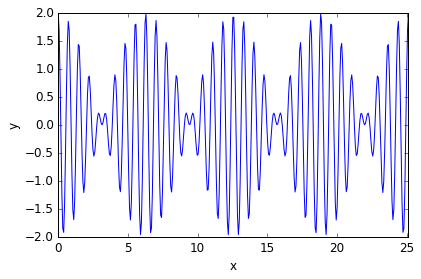

In [25]:
g = 9.81
H = 1.
omega1 = (g*k1)**.5 
omega2 = (g*k2)**.5

y1 = np.cos(k1*xx - omega1*tt)
y2 = np.cos(k2*xx - omega2*tt)
y = y1 + y2

pl.plot(x, y[0,:])
pl.xlabel('x')
pl.ylabel('y')
pl.xlim(x.min(), x.max())
pl.tight_layout()

In [26]:
c1 = g**.5 * k1**(-.5)
c2 = g**.5 * k2**(-.5)
cg1 = 0.5 * g**.5 * k1**(-.5)
cg2 = 0.5 * g**.5 * k2**(-.5)

c1_x = c1*t
c2_x = c2*t
cg1_x = cg1*t
c1_x %= max(x)
c2_x %= max(x)
cg1_x %= max(x)

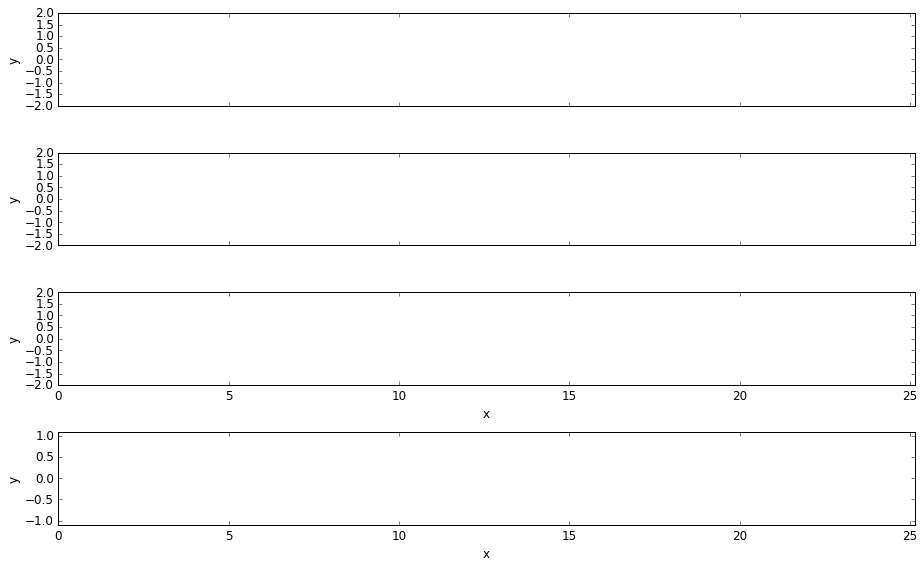

In [27]:
# First set up the figure, the axis, and the plot element we want to animate
fig = pl.figure(figsize=(13,8))
xmin, xmax = np.min(x), np.max(x)
ymin, ymax = -2., 2
tmin, tmax = np.min(t), np.max(t)

ax  = pl.subplot(411, xlim=(xmin, xmax), ylim=(ymin, ymax), ylabel='y')
line,  = ax .plot([], [], lw=2, c='b')
pl.setp(ax.get_xticklabels(), visible=False)
ax1 = pl.subplot(412, xlim=(xmin, xmax), ylim=(ymin, ymax), ylabel='y')
line1, = ax1.plot([], [], lw=2, c='r')
pl.setp(ax1.get_xticklabels(), visible=False)
ax2 = pl.subplot(413, xlim=(xmin, xmax), ylim=(ymin, ymax), xlabel='x', ylabel='y')
line2, = ax2.plot([], [], lw=2, c='g')
ax_c = pl.subplot(414, xlim=(xmin, xmax), ylim=(-1.1, 1.1), xlabel='x', ylabel='y')
linet,  = ax_c.plot([], [], 'bo-', lw=2)
linet1, = ax_c.plot([], [], 'ro-', lw=2)
linet2, = ax_c.plot([], [], 'go-', lw=2)
fig.tight_layout()

In [ ]:
# initialization function: plot the background of each frame
def animate(i):
    line .set_data(x, y [i,:])
    line1.set_data(x, y1[i,:])
    line2.set_data(x, y2[i,:])
    
    linet .set_data([0, cg1_x[i]], [ 1,  1])
    linet1.set_data([0, c1_x [i]], [ 0,  0])
    linet2.set_data([0, c2_x [i]], [-1, -1])
    return line, line1, line2, linet, linet1, linet2

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=y.shape[0], interval=40, blit=True)

HTML(anim.to_html5_video())